In [1]:
import pandas as pd


In [ ]:
data=pd.read_csv('공공보건의료기관현황.csv',encoding='CP949') #깨짐 문제 방지를 위해 당시 사용했던 CP949방식으로 인코딩을 해줌
data.head()

,시도,시군구,기관유형,상위 보건기관명,보건기관명,주소,읍면동명,도서지역 여부,대표 전화번호
0,서울특별시,종로구,보건소,종로구보건소,종로구보건소,"서울특별시 종로구 자하문로19길 36 (옥인동, 종로구보건소, 청운효자동자치회관) ...",청운효자동,아니오,02-2148-3514
1,서울특별시,중구,보건소,서울중구보건소,서울중구보건소,"서울특별시 중구 다산로39길 16 (무학동, 중구보건소)",신당동,아니오,02-3396-6302
2,서울특별시,중구,일반보건지소,서울중구보건소,약수보건지소,"서울특별시 중구 다산로 92 (신당동, 약수동주민센터) 약수동주민센터",신당동,아니오,02-3396-6964
3,서울특별시,중구,일반보건지소,서울중구보건소,황학보건지소,"서울특별시 중구 난계로11길 52 (황학동, 황학동주민센터) 황학동주민센터",황학동,아니오,02-3396-6989
4,서울특별시,중구,일반보건지소,서울중구보건소,다산보건지소,"서울특별시 중구 동호로15길 50 (신당동, 동사무소어린이집)",신당동,아니오,02-3396-6959


In [ ]:
#표 쪼개기
addr1=data.loc[0,'주소']
addr1.split()[:2]
addr=data['주소'].apply(lambda x:x.split()[:2]).to_list() #data의 주소 열에서 lambda를 통해 나눠주고 2번째까지 가져와 리스트로 만듦(seris에서 list로 변환시켜주면서 for/while문 도 사용 가능하며, 호환성 측면에서도 유리해지는 장점이 있음)
addr

#주소에서 시도/군구 추출해서 df화
#이 둘을 합쳐서 시도군구 열 만듦
#행정구역별 인구 가지고 와서 merge 시킴
# 인구대비 공공보건의료기관 수 계산(인구/의료기관)
#자료 바탕으로 barh추출






[['서울특별시', '종로구'],
 ['서울특별시', '중구'],
 ['서울특별시', '중구'],
 ['서울특별시', '중구'],
 ['서울특별시', '중구'],
 ['서울특별시', '용산구'],
 ['서울특별시', '성동구'],
 ['서울특별시', '성동구'],
 ['서울특별시', '광진구'],
 ['서울특별시', '광진구'],
 ['서울특별시', '광진구'],
 ['서울특별시', '동대문구'],
 ['서울특별시', '중랑구'],
 ['서울특별시', '중랑구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '성북구'],
 ['서울특별시', '강북구'],
 ['서울특별시', '도봉구'],
 ['서울특별시', '도봉구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '노원구'],
 ['서울특별시', '은평구'],
 ['서울특별시', '은평구'],
 ['서울특별시', '은평구'],
 ['서울특별시', '서대문구'],
 ['서울특별시', '서대문구'],
 ['서울특별시', '마포구'],
 ['서울특별시', '마포구'],
 ['서울특별시', '마포구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '양천구'],
 ['서울특별시', '강서구'],
 ['서울특별시', '강서구'],
 ['서울특별시', '구로구'],
 ['서울특별시', '구로구'],
 ['서울특별시', '구로구'],
 ['서울특별시', '금천구'],
 ['서울특별시', '금천구'],
 ['서울특별시', '영등포구'],
 ['서울특별시', '동작구'],
 ['서울특별시', '동작구'],
 ['서울특별시', '관악구'],
 ['서울특별시', '관악구'],
 ['서울특별시', '서초구'],
 ['서울특별시', '서초구'],
 ['서울특별시', '

In [4]:
addr=pd.DataFrame(addr, columns=['시도','군구'])
addr.head(2)

,시도,군구
0,서울특별시,종로구
1,서울특별시,중구


In [5]:
new_address ={'강원도':'강원특별자치도', '전라북도':'전북특별자치도'}
addr['시도'] = addr['시도'].apply(lambda x:new_address.get(x, x))

In [6]:
addr['시도군구'] = addr['시도'] + ' ' + addr['군구']
addr.head(2)

,시도,군구,시도군구
0,서울특별시,종로구,서울특별시 종로구
1,서울특별시,중구,서울특별시 중구


In [7]:
addr_group=addr.groupby(['시도','군구','시도군구'], as_index=False).size()
addr_group.rename(columns={'size':'count'},inplace=True)
addr_group.set_index('시도군구',inplace=True)
addr_group.head()

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19
강원특별자치도 고성군,강원특별자치도,고성군,14
강원특별자치도 동해시,강원특별자치도,동해시,4
강원특별자치도 삼척시,강원특별자치도,삼척시,15
강원특별자치도 속초시,강원특별자치도,속초시,1


In [8]:
population=pd.read_csv('행정구역별 인구수.csv',index_col=0)
population.rename(columns={'행정구역1':'시도','행정구역2':'군구'},inplace=True)
population['시도군구']=population['시도']+' '+population['군구']
population.head(5)

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,전국,합계,51313912,25558944,25754968,전국 합계
1,서울특별시,소계,9384325,4538354,4845971,서울특별시 소계
2,서울특별시,종로구,139378,67240,72138,서울특별시 종로구
3,서울특별시,중구,121322,58651,62671,서울특별시 중구
4,서울특별시,용산구,212175,101793,110382,서울특별시 용산구


In [9]:
filt=population['군구'] !='합계'
population=population[filt]
filt=population['군구'] !='소계'
population=population[filt]
population.set_index('시도군구',inplace=True)
population.head(2)

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139378,67240,72138
서울특별시 중구,서울특별시,중구,121322,58651,62671


In [10]:
local_population=addr_group.merge(population,how='inner',on='시도군구')
local_population.head(2)

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,강원특별자치도,강릉시,209174,103616,105558
강원특별자치도 고성군,강원특별자치도,고성군,14,강원특별자치도,고성군,27294,14008,13286


In [11]:
cols=local_population.columns
local_population=local_population[['시도_x','군구_x','count','총인구수']]
local_population.rename(columns={'시도_x':'시도','군구_x':'군구'},inplace=True)
local_population['ratio']=local_population['count']/local_population['총인구수']*1000
local_population.head()

,시도,군구,count,총인구수,ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,209174,0.090833
강원특별자치도 고성군,강원특별자치도,고성군,14,27294,0.512933
강원특별자치도 동해시,강원특별자치도,동해시,4,88591,0.045151
강원특별자치도 삼척시,강원특별자치도,삼척시,15,62309,0.240736
강원특별자치도 속초시,강원특별자치도,속초시,1,82021,0.012192


In [12]:
local_population.to_csv('인구수별공공의료기관수.csv')
local=pd.read_csv('인구수별공공의료기관수.csv',index_col=0)
local.sort_values('count',ascending=False)

,시도,군구,count,총인구수,ratio
시도군구,,,,,
경상북도 상주시,경상북도,상주시,44,93645,0.469860
충청북도 청주시,충청북도,청주시,44,851951,0.051646
전라남도 고흥군,전라남도,고흥군,43,61057,0.704260
전북특별자치도 정읍시,전북특별자치도,정읍시,43,103590,0.415098
전북특별자치도 익산시,전북특별자치도,익산시,42,269429,0.155885
...,...,...,...,...,...
부산광역시 수영구,부산광역시,수영구,1,174086,0.005744
부산광역시 사상구,부산광역시,사상구,1,202376,0.004941
부산광역시 영도구,부산광역시,영도구,1,106335,0.009404


In [13]:
group=local.groupby('시도')['count'].size()
group

시도
강원특별자치도    18
경기도        31
경상남도       18
경상북도       22
광주광역시       5
대구광역시       8
대전광역시       5
부산광역시      16
서울특별시      25
울산광역시       5
인천광역시      10
전라남도       22
전북특별자치도    14
제주특별자치도     2
충청남도       15
충청북도       11
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

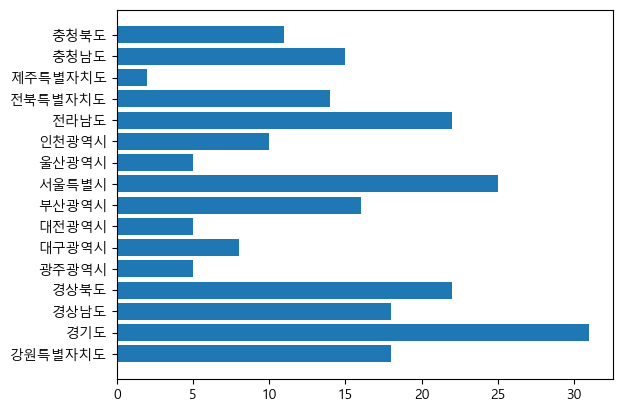

In [15]:
plt.barh(group.index, group.values)
plt.show()